<a href="https://colab.research.google.com/github/AbrahamtheAraiza99/inteligencia-artificial/blob/master/RED_NEURONAL_BASICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz de Confusión:
[[30  2]
 [ 8 20]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



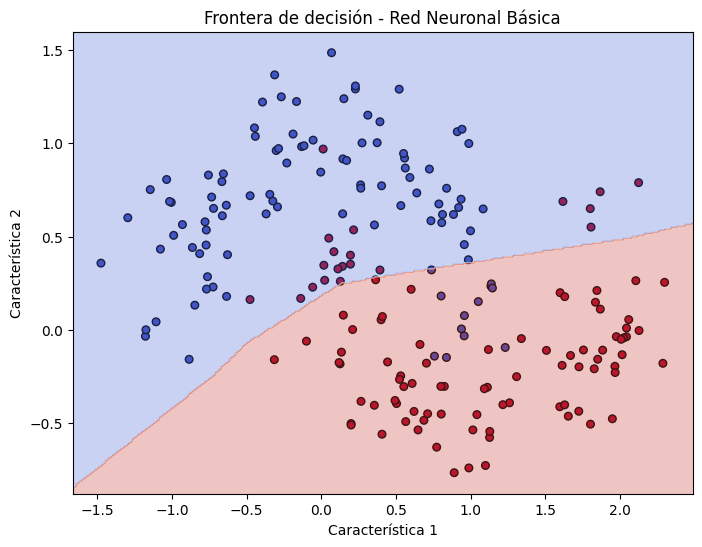

In [1]:
# Paso 1: Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Paso 2: Crear un conjunto de datos no lineal (ideal para red neuronal)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Paso 3: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Paso 4: Crear y entrenar la red neuronal (MLPClassifier)
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000,
                      activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)

# Paso 5: Evaluar el modelo
y_pred = model.predict(X_test)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Paso 6: Visualizar la frontera de decisión
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Malla para la frontera
    xx = np.linspace(xlim[0], xlim[1], 300)
    yy = np.linspace(ylim[0], ylim[1], 300)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.predict(xy).reshape(XX.shape)

    # Mostrar frontera
    plt.contourf(XX, YY, Z, alpha=0.3, cmap='coolwarm')
    plt.title("Frontera de decisión - Red Neuronal Básica")
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.show()

plot_decision_boundary(model, X, y)
